In [1]:
# import packages
import numpy as np # NumPy is a Python package that stands for ‘Numerical Python’. It is the core library for scientific computing
import pandas as pd # Pandas is used for data manipulation, analysis and cleaning.
import matplotlib.pyplot as plt # powerful plotting library for python that offers a varied spectrum of 1D, 2D, and 3D visualizations. 
from IPython.display import display, HTML, display_html # Display the HTML representation of an object.
import seaborn as sns # Seaborn is a data visualization library in Python based on matplotlib


In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [6]:
from pandas import read_csv #  imports a CSV file to DataFrame format.
dataset = read_csv('hcv.csv')# read csv

dataset # return top and bottom n (5 by default) rows of a data frame

dataset.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [7]:
dataset.shape # rows, columns

(615, 13)

In [8]:
display(dataset.iloc[:,:].isnull().any()) # which column has null values (missing values)

Category    False
Age         False
Sex         False
ALB          True
ALP          True
ALT          True
AST         False
BIL         False
CHE         False
CHOL         True
CREA        False
GGT         False
PROT         True
dtype: bool

In [11]:
dataset['ALB'].fillna(dataset['ALB'].median(), inplace = True)
dataset['ALP'].fillna(dataset['ALP'].mean(), inplace = True)
dataset['ALT'].fillna(dataset['ALT'].median(), inplace = True)
dataset['CHOL'].fillna(dataset['CHOL'].mean(), inplace = True)
dataset['PROT'].fillna(dataset['PROT'].median(), inplace = True)

In [12]:
dataset.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

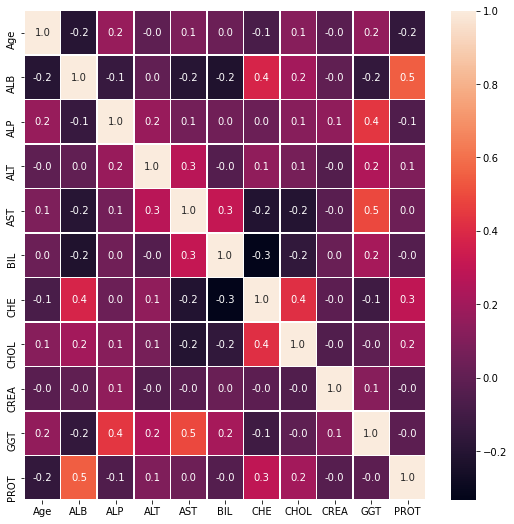

In [13]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

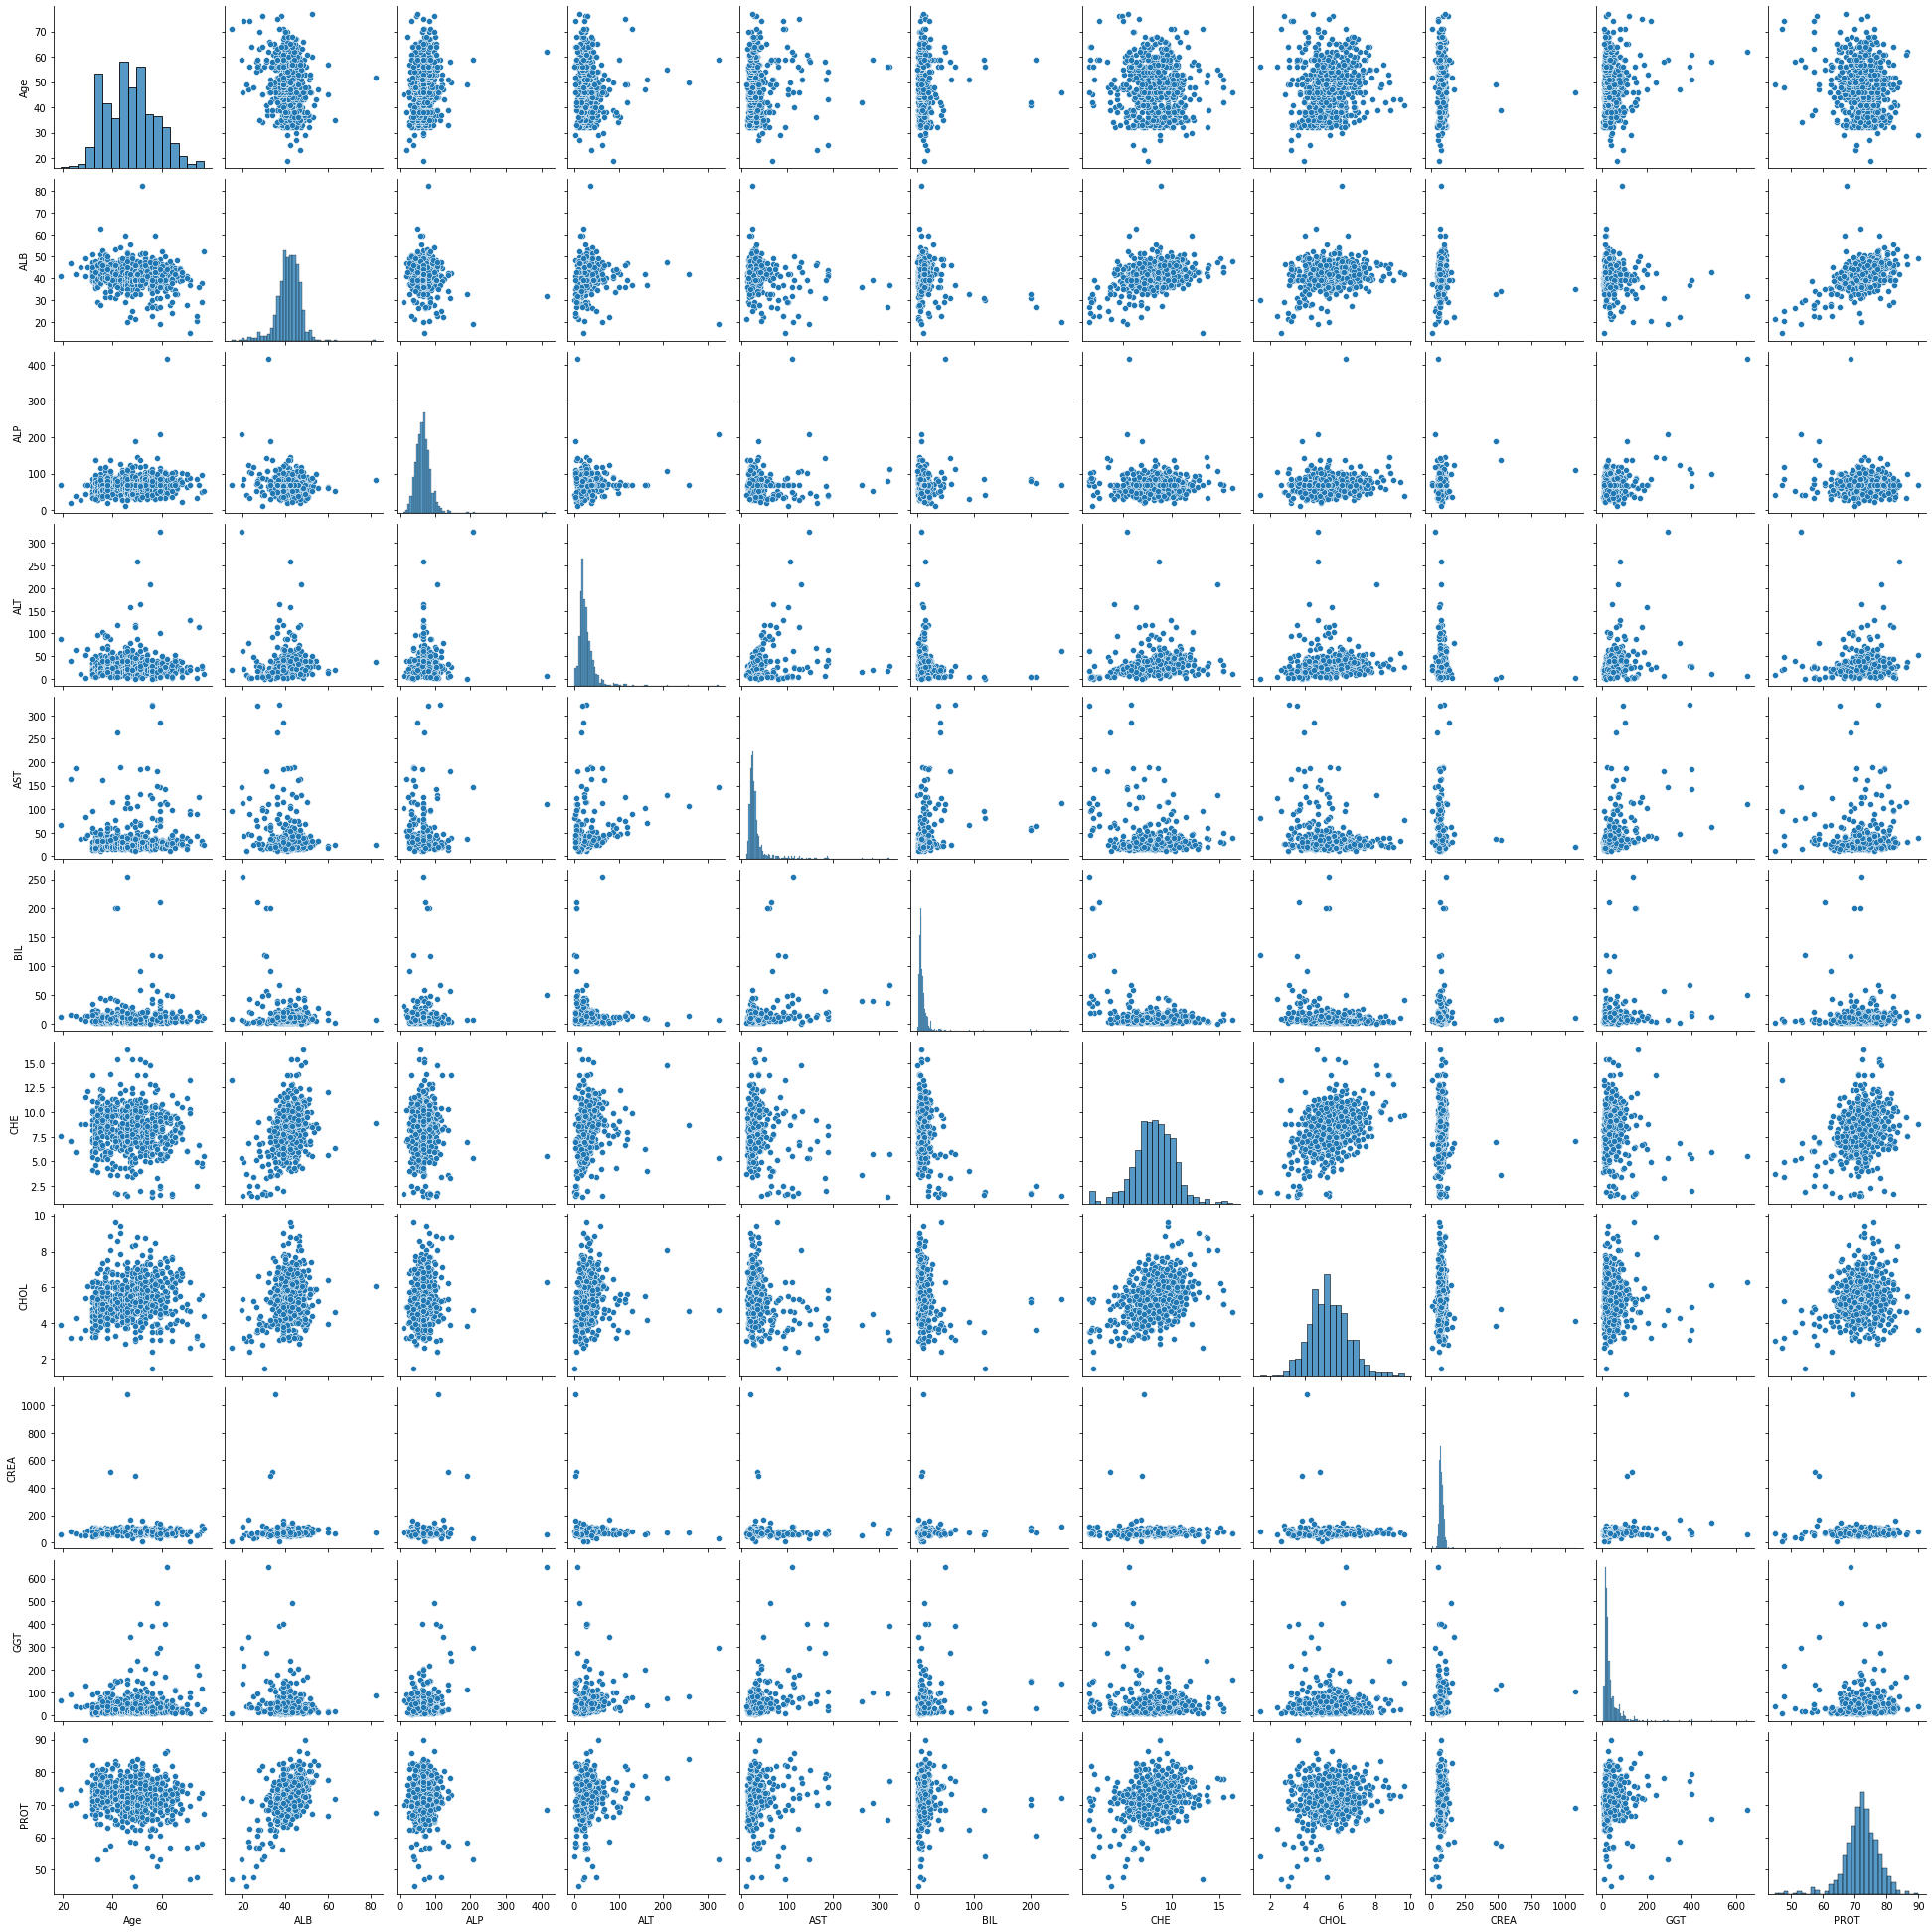

In [14]:
sns.pairplot(dataset)

In [16]:
nu = ['int16', 'int32','int64', 'float16', 'float32', 'float64']    # selecting only numerical features from the dataset
nu_features = list(dataset.select_dtypes(include=nu).columns)

outlier = dataset[nu_features]

sorted(outlier)

Q1 = dataset.quantile(0.25) 
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

outlier_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis = 1)]
print(outlier_out.shape)

outlier_out.to_csv("hcv.csv", index = False)

Age     15.000
ALB      6.400
ALP     26.350
ALT     16.650
AST     11.300
BIL      5.900
CHE      2.655
CHOL     1.435
CREA    21.000
GGT     24.500
PROT     6.100
dtype: float64
(447, 13)


In [17]:
from pandas import read_csv #  imports a CSV file to DataFrame format.
dataset = read_csv('hcv.csv')# read csv
dataset.shape

(447, 13)

In [23]:
# converting type of columns to 'category'
dataset['Sex'] = dataset['Sex'].astype('category')
# Assigning numerical values and storing in another column
dataset['Sex'] = dataset['Sex'].cat.codes
dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
3,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
4,0,32,1,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5


In [24]:
X = dataset.drop(['Category'], axis = 1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
3,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
4,32,1,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5


In [25]:
# converting type of columns to 'category'
dataset['Category'] = dataset['Category'].astype('category')
# Assigning numerical values and storing in another column
dataset['Category'] = dataset['Category'].cat.codes
dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
3,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
4,0,32,1,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5


In [26]:
y = dataset['Category']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int8

In [27]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X) # Feature scaling with standardization
X_std

array([[-1.58872682,  0.89172906, -0.88383708, ...,  2.07999446,
        -0.8497326 , -0.78695023],
       [-1.58872682,  0.89172906, -0.88383708, ..., -0.29452395,
        -0.6002568 ,  1.02640508],
       [-1.58872682,  0.89172906,  0.24214274, ...,  0.15069825,
         0.69701737,  0.83298051],
       ...,
       [ 1.06033648, -1.12141685,  0.1942287 , ..., -0.48745357,
         0.27647245,  2.35619897],
       [ 2.22592433, -1.12141685,  0.1942287 , ...,  0.21748158,
        -0.86398836,  0.9296928 ],
       [ 0.21263622, -1.12141685, -0.76405199, ...,  0.81853156,
         2.06557033,  1.63085685]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_std, y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(312, 12) (67, 12) (68, 12) (312,) (67,) (68,)


In [30]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(12,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
10/10 [==============================] - 4s 164ms/step - loss: 0.7481 - accuracy: 0.4451 - val_loss: 0.6517 - val_accuracy: 0.7164
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6429 - accuracy: 0.7228 - val_loss: 0.5837 - val_accuracy: 0.8060
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5760 - accuracy: 0.8515 - val_loss: 0.5286 - val_accuracy: 0.8806
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5390 - accuracy: 0.9328 - val_loss: 0.4842 - val_accuracy: 0.9254
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4807 - accuracy: 0.9751 - val_loss: 0.4468 - val_accuracy: 0.9552
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4528 - accuracy: 0.9699 - val_loss: 0.4151 - val_accuracy: 0.9552
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3805 - accuracy: 0.9865 - val_loss: 0.3886 - val_accuracy: 0.9552
Epoch 8/1

In [32]:
model.evaluate(X_test, Y_test)[1]

3/3 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9559


0.9558823704719543

The accuracy of this model is 95.59%